Explore the Combined Dataset

In [2]:
import pandas as pd

df = pd.read_csv("all_years_combined_player_stats.csv")
df.head()
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   #         201 non-null    float64
 1   Player    213 non-null    object 
 2   gp - gs   213 non-null    object 
 3   g         213 non-null    int64  
 4   A         213 non-null    int64  
 5   pts       213 non-null    int64  
 6   sh        213 non-null    int64  
 7   sh%       213 non-null    float64
 8   sog       213 non-null    int64  
 9   sog%      213 non-null    float64
 10  gwg       213 non-null    int64  
 11  FPG       213 non-null    int64  
 12  FPS       213 non-null    int64  
 13  GB        213 non-null    int64  
 14  to        213 non-null    int64  
 15  ct        213 non-null    int64  
 16  dc        213 non-null    int64  
 17  fouls     213 non-null    int64  
 18  RC-YC-GC  213 non-null    object 
 19  Year      213 non-null    int64  
dtypes: float64(3), int64(14), object

,#,g,A,pts,sh,sh%,sog,sog%,gwg,FPG,FPS,GB,to,ct,dc,fouls,Year
count,201.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,23.741294,21.201878,10.699531,31.901408,46.389671,0.254746,34.126761,0.429587,0.915493,3.699531,8.201878,24.117371,22.004695,12.215962,22.868545,35.431925,2022.474178
std,17.304414,58.080958,29.901944,87.549957,127.709293,0.286818,93.532195,0.399227,2.697377,10.673272,23.872531,66.453419,63.184702,33.817774,66.758376,101.630998,1.703365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2020.000000
25%,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,2021.000000
50%,21.000000,1.000000,0.000000,1.000000,1.000000,0.200000,1.000000,0.615000,0.000000,0.000000,0.000000,5.000000,4.000000,2.000000,1.000000,6.000000,2022.000000
75%,34.000000,13.000000,6.000000,20.000000,31.000000,0.469000,22.000000,0.764000,0.000000,2.000000,5.000000,15.000000,14.000000,7.000000,7.000000,26.000000,2024.000000
max,88.000000,337.000000,191.000000,528.000000,716.000000,1.000000,521.000000,1.000000,18.000000,65.000000,141.000000,361.000000,339.000000,210.000000,384.000000,654.000000,2025.000000


Clean Up & Rename Columns

In [9]:
# First, drop rows where 'gp - gs' is null or doesn't contain a "-"
df_clean = df[df['gp - gs'].notnull() & df['gp - gs'].str.contains('-')].copy()

# Now safely split and convert
df_clean[['GP', 'GS']] = df_clean['gp - gs'].str.split('-', expand=True)
df_clean['GP'] = pd.to_numeric(df_clean['GP'], errors='coerce').fillna(0).astype(int)
df_clean['GS'] = pd.to_numeric(df_clean['GS'], errors='coerce').fillna(0).astype(int)

# Drop the old columns if needed
df_clean.drop(columns=['gp - gs', '#'], inplace=True, errors='ignore')

# Rename others if needed
df_clean.rename(columns={
    'g': 'Goals',
    'A': 'Assists',
    'pts': 'Points',
    'sh': 'Shots',
    'sh%': 'Shot_Percentage',
    'sog': 'Shots_On_Goal',
    'sog%': 'SOG_Percentage',
    'gwg': 'Game_Winning_Goals',
    'FPG': 'Free_Position_Goals',
    'FPS': 'Free_Position_Shots',
    'GB': 'Ground_Balls',
    'to': 'Turnovers',
    'ct': 'Caused_Turnovers',
    'dc': 'Draw_Controls',
    'fouls': 'Fouls',
    'RC-YC-GC': 'Cards'
}, inplace=True)

In [10]:
df_clean.head()

,Player,Goals,Assists,Points,Shots,Shot_Percentage,Shots_On_Goal,SOG_Percentage,Game_Winning_Goals,Free_Position_Goals,Free_Position_Shots,Ground_Balls,Turnovers,Caused_Turnovers,Draw_Controls,Fouls,Cards,Year,GP,GS
0,"Hawryschuk, Emily",39,7,46,66,0.591,55,0.833,3,9,17,12,20,7,17,12,0-1-0,2020,8,8
1,"Carney, Megan",21,11,32,45,0.467,31,0.689,2,1,9,5,8,4,0,10,0-3-0,2020,8,8
2,"Tyrrell, Meaghan",19,9,28,33,0.576,27,0.818,0,3,5,10,7,2,1,7,0-1-1,2020,8,8
3,"Swart, Sam",12,10,22,30,0.400,23,0.767,0,2,5,5,5,3,1,5,0-0-0,2020,8,8
4,"Cockerille, Sierra",12,5,17,25,0.480,20,0.800,1,0,0,0,2,0,0,3,0-1-0,2020,8,0


 Add a “GameChanger Score” Feature

In [11]:
df_clean['GameChanger_Score'] = (
    df_clean['Goals'] * 2 +
    df_clean['Assists'] * 1.5 +
    df_clean['Game_Winning_Goals'] * 3 +
    df_clean['SOG_Percentage'] * 5 -
    df_clean['Turnovers']
)

Calculate Year-over-Year Improvement per Player

In [13]:
# Average points by player by year
pivot = df_clean.pivot_table(index='Player', columns='Year', values='Points', aggfunc='sum')

# Calculate improvement from earliest to latest year (or use specific years like 2020 to 2025)
pivot['Improvement'] = pivot[2025].fillna(0) - pivot[2020].fillna(0)


# Top improved player
pivot.sort_values(by='Improvement', ascending=False).head(1)

Year,2020,2021,2022,2023,2024,2025,Improvement
Player,,,,,,,
"Ward, Emma",NaN,73.0,NaN,94.0,81.0,76.0,76.0


Top Performers Analysis

In [14]:
# Top scorer per year
top_scorers = df_clean.loc[df_clean.groupby('Year')['Goals'].idxmax()][['Year', 'Player', 'Goals']]

# Most assists per year
top_assists = df_clean.loc[df_clean.groupby('Year')['Assists'].idxmax()][['Year', 'Player', 'Assists']]

# Most game-winning goals per year
top_gwg = df_clean.loc[df_clean.groupby('Year')['Game_Winning_Goals'].idxmax()][['Year', 'Player', 'Game_Winning_Goals']]

Create Visuals 

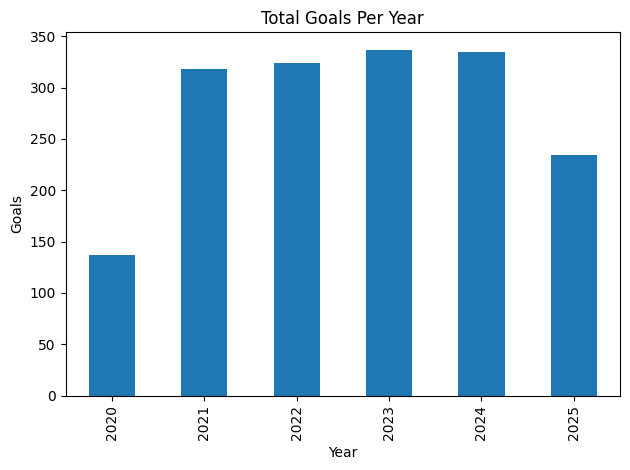

In [18]:
import matplotlib.pyplot as plt

# Total Goals by Year
df_clean.groupby('Year')['Goals'].sum().plot(kind='bar', title='Total Goals Per Year')
plt.ylabel('Goals')
plt.tight_layout()
plt.show()



Total Team Performance (2020–2025)

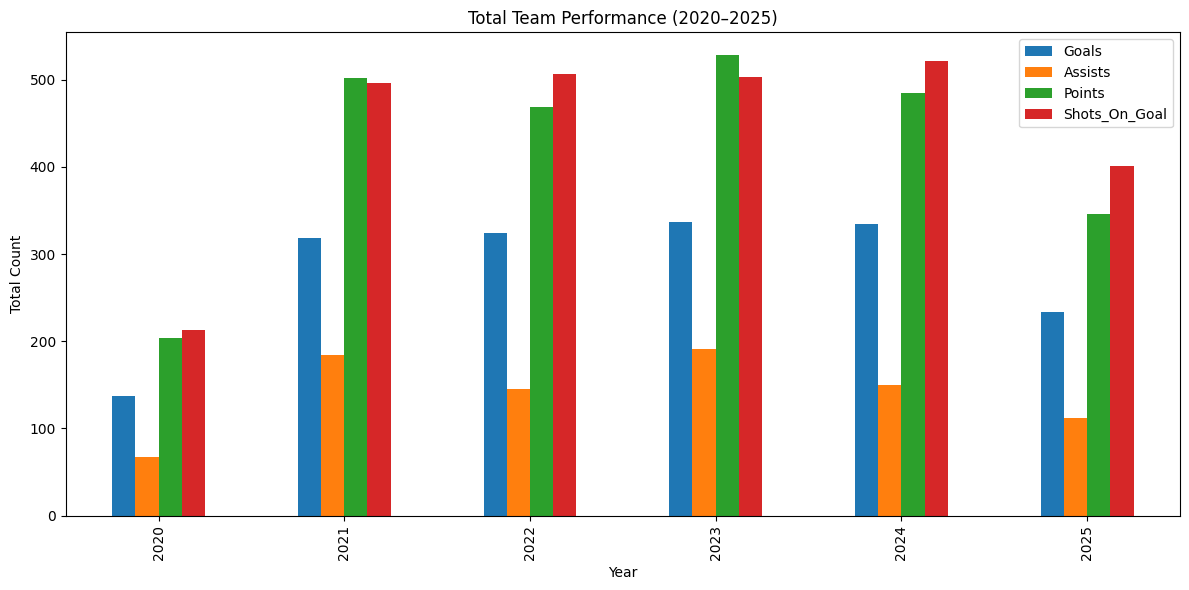

In [19]:
team_stats = df_clean.groupby('Year')[['Goals', 'Assists', 'Points', 'Shots_On_Goal']].sum()

team_stats.plot(kind='bar', figsize=(12,6))
plt.title('Total Team Performance (2020–2025)')
plt.ylabel("Total Count")
plt.tight_layout()
plt.show()

Most Improved Players

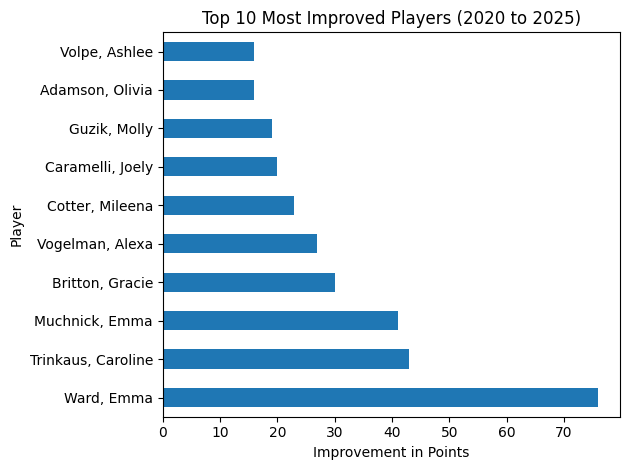

In [16]:
import matplotlib.pyplot as plt

pivot['Improvement'] = pivot[2025].fillna(0) - pivot[2020].fillna(0)
pivot['Improvement'].sort_values(ascending=False).head(10).plot(kind='barh', title='Top 10 Most Improved Players (2020 to 2025)')
plt.xlabel("Improvement in Points")
plt.tight_layout()
plt.show()

Plot GameChanger Score Top 10

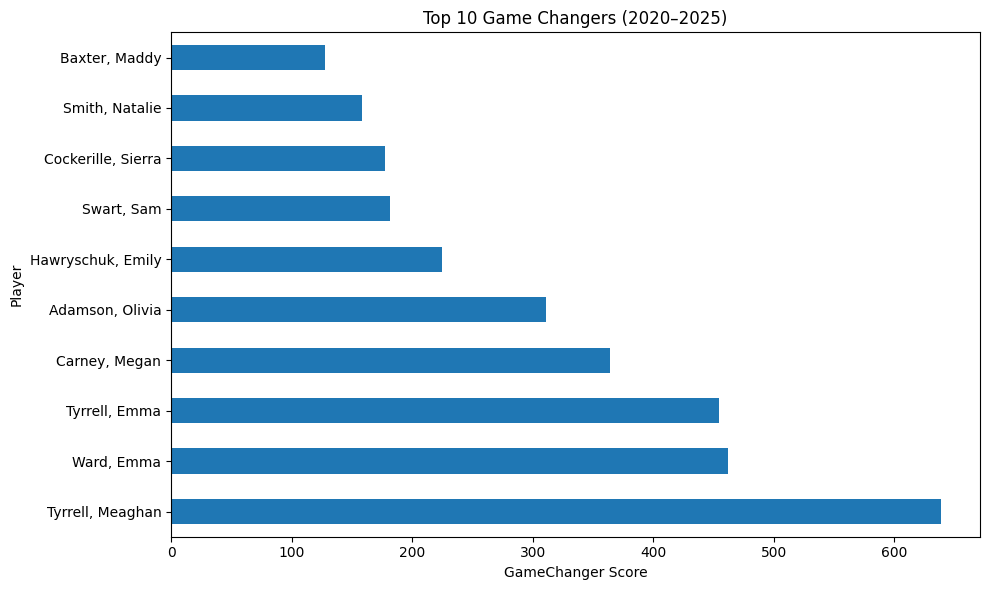

In [20]:
top_gc = df_clean.groupby('Player')['GameChanger_Score'].sum().sort_values(ascending=False).head(10)

top_gc.plot(kind='barh', title='Top 10 Game Changers (2020–2025)', figsize=(10,6))
plt.xlabel("GameChanger Score")
plt.tight_layout()
plt.show()

Player Consistency Across Seasons

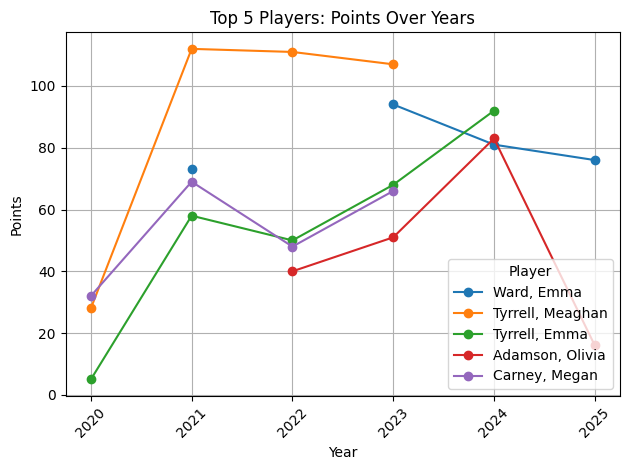

In [21]:
top_players = pivot.sum(axis=1).sort_values(ascending=False).head(5).index
pivot.loc[top_players].T.drop('Improvement').plot(marker='o', title='Top 5 Players: Points Over Years')
plt.ylabel("Points")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Distribution of GameChanger Score

In [23]:
import seaborn as sns

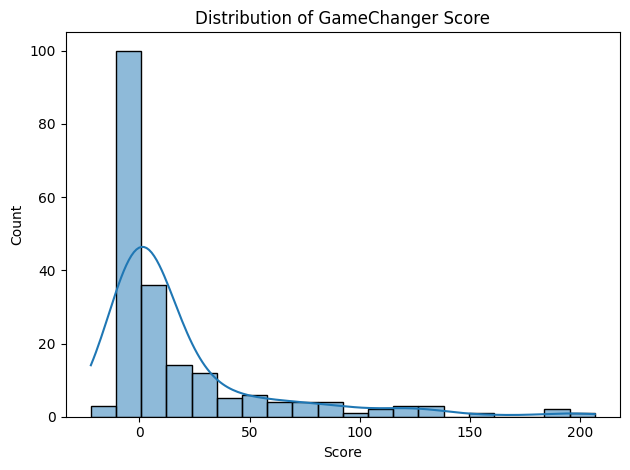

In [24]:
sns.histplot(df_clean['GameChanger_Score'], bins=20, kde=True)
plt.title("Distribution of GameChanger Score")
plt.xlabel("Score")
plt.tight_layout()
plt.show()

 Player Efficiency Rating (PER-like score)

In [26]:
df_clean['Player_Efficiency'] = (
    df_clean['Goals'] / df_clean['Shots'].replace(0, 1) +  # Avoid division by 0
    df_clean['SOG_Percentage'] +
    df_clean['Points'] / df_clean['GP'].replace(0, 1)
)

top_eff = df_clean.sort_values('Player_Efficiency', ascending=False).head(10)
top_eff

,Player,Goals,Assists,Points,Shots,Shot_Percentage,Shots_On_Goal,SOG_Percentage,Game_Winning_Goals,Free_Position_Goals,...,Turnovers,Caused_Turnovers,Draw_Controls,Fouls,Cards,Year,GP,GS,GameChanger_Score,Player_Efficiency
0,"Hawryschuk, Emily",39,7,46,66,0.591,55,0.833,3,9,...,20,7,17,12,0-1-0,2020,8,8,81.665,7.173909
75,"Tyrrell, Meaghan",78,33,111,131,0.595,109,0.832,7,5,...,24,6,0,25,0-3-0,2022,21,21,206.660,6.713134
34,"Tyrrell, Meaghan",68,44,112,122,0.557,97,0.795,5,11,...,31,3,0,31,0-1-0,2021,21,21,189.975,6.685710
36,"Carney, Megan",49,20,69,94,0.521,76,0.809,1,6,...,22,3,1,33,0-3-1,2021,13,13,113.045,6.637969
187,"Adamson, Olivia",10,6,16,18,0.556,13,0.722,1,1,...,7,1,5,1,0-0-1,2025,3,3,28.610,6.610889
45,"Hawryschuk, Emily",4,1,5,6,0.667,5,0.833,0,0,...,2,0,6,1,0-1-0,2021,1,1,11.665,6.499667
107,"Tyrrell, Meaghan",55,52,107,115,0.478,87,0.757,8,6,...,22,3,2,21,0-4-0,2023,21,21,193.785,6.330499
108,"Ward, Emma",38,56,94,73,0.521,48,0.658,1,7,...,30,1,0,15,0-2-0,2023,21,3,136.290,5.654738
77,"Tyrrell, Emma",30,20,50,56,0.536,43,0.768,1,10,...,22,7,64,19,0-1-0,2022,12,12,74.840,5.470381
143,"Tyrrell, Emma",70,22,92,135,0.519,102,0.756,4,12,...,29,7,6,7,0-0-3,2024,22,22,159.780,5.456337


Offense vs. Defense Cluster Plot
- Group players based on offensive (goals + assists) vs defensive stats (GB, CT).

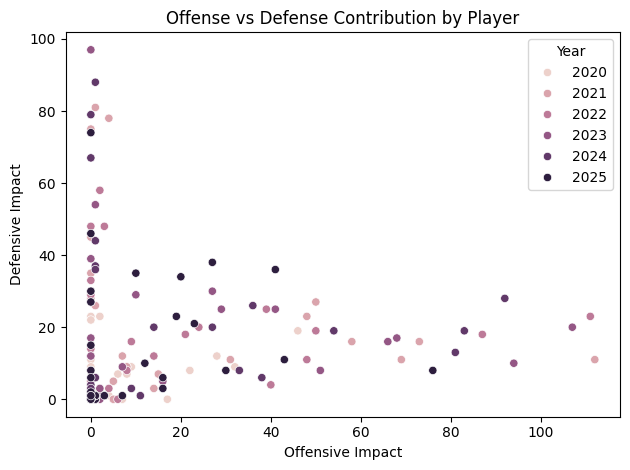

In [27]:
sns.scatterplot(
    data=df_clean,
    x=df_clean['Goals'] + df_clean['Assists'],
    y=df_clean['Ground_Balls'] + df_clean['Caused_Turnovers'],
    hue='Year'
)
plt.xlabel("Offensive Impact")
plt.ylabel("Defensive Impact")
plt.title("Offense vs Defense Contribution by Player")
plt.tight_layout()
plt.show()

Turnover Ratio
- Find players with high turnovers relative to their contributions.

In [28]:
df_clean['Turnover_Ratio'] = df_clean['Turnovers'] / (df_clean['Points'] + 1)

df_clean[['Player', 'Year', 'Turnover_Ratio']].sort_values('Turnover_Ratio', ascending=False).head(10)

,Player,Year,Turnover_Ratio
164,"Mashewske, Kate",2024,23.000000
125,"Sweitzer, Delaney",2023,22.000000
63,"Goldstock, Asa",2021,10.000000
162,"Sweitzer, Delaney",2024,9.000000
55,"Mashewske, Kate",2021,8.000000
95,"Hower, Kimber",2022,8.000000
196,"Guyette, Daniella",2025,8.000000
90,"Mashewske, Kate",2022,7.333333
54,"Defliese, Kerry",2021,7.000000
103,"Chevarie, Bianca",2022,7.000000


Shooting Accuracy by Player

In [29]:
df_clean['Shooting_Accuracy'] = df_clean['Goals'] / df_clean['Shots'].replace(0, 1)

df_clean[['Player', 'Year', 'Shooting_Accuracy']].sort_values('Shooting_Accuracy', ascending=False).head(10)

,Player,Year,Shooting_Accuracy
10,"Carter, Molly",2020,1.0
49,"Fahey, Grace",2021,1.0
16,"Marino, Danielle",2020,1.0
13,"Simkins, Ella",2020,1.0
194,"Rich, Mackenzie",2025,1.0
123,"Goodale, Katie",2023,1.0
124,"Rehder, Caroline",2023,1.0
120,"Mashewske, Kate",2023,1.0
90,"Mashewske, Kate",2022,1.0
160,"Clark, Superia",2024,1.0


Team Yearly Shooting Accuracy

/tmp/ipykernel_4149/334951335.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  accuracy_by_year = df_clean.groupby('Year').apply(


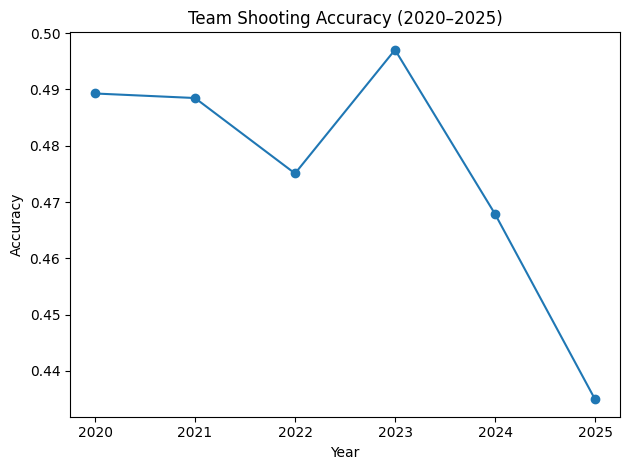

In [30]:
accuracy_by_year = df_clean.groupby('Year').apply(
    lambda x: x['Goals'].sum() / x['Shots'].sum()
)

accuracy_by_year.plot(kind='line', marker='o', title="Team Shooting Accuracy (2020–2025)")
plt.ylabel("Accuracy")
plt.tight_layout()
plt.show()

 Points Distribution by Year (Boxplot)

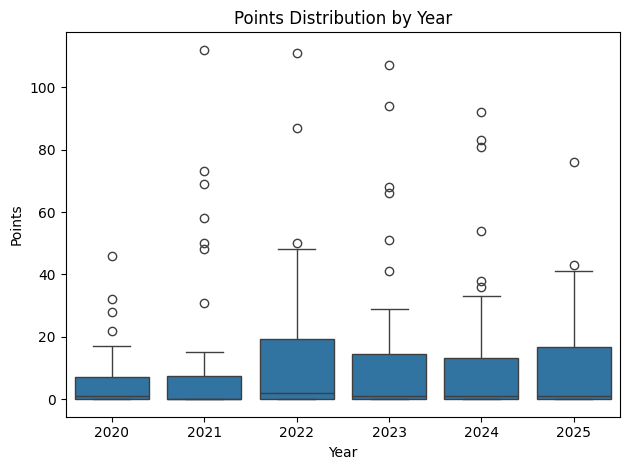

In [31]:
sns.boxplot(data=df_clean, x='Year', y='Points')
plt.title("Points Distribution by Year")
plt.tight_layout()
plt.show()

Correlation Matrix

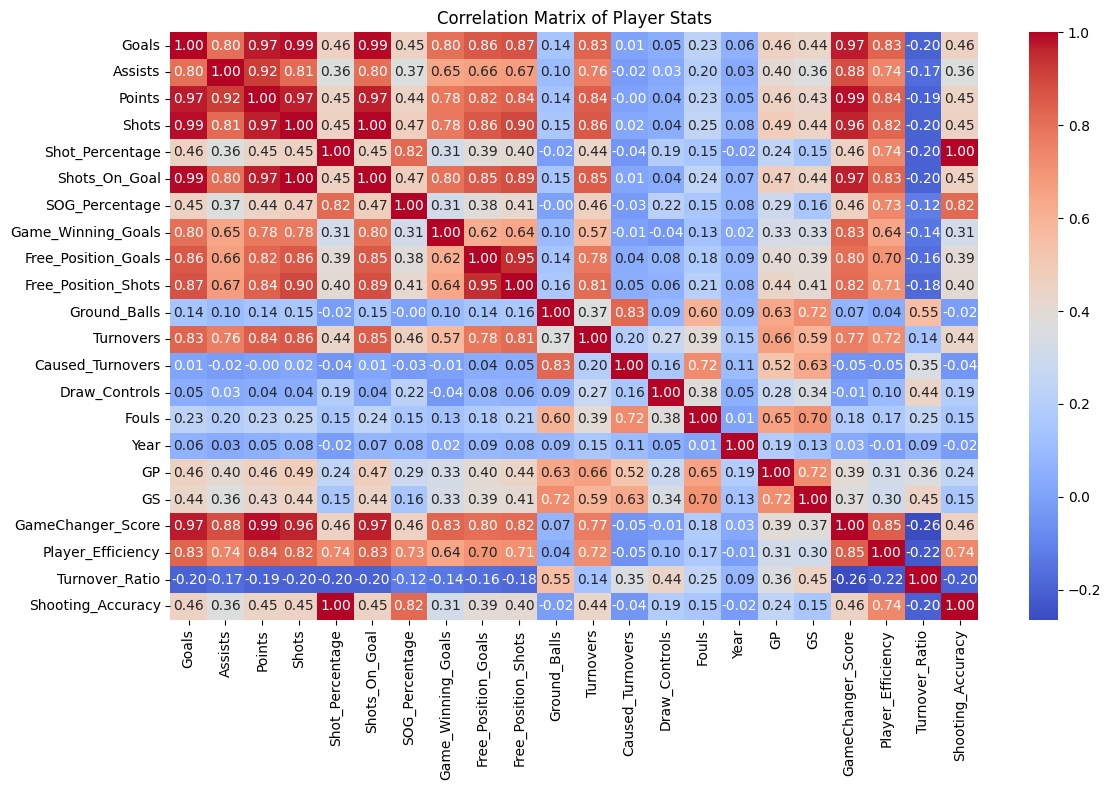

In [32]:
import numpy as np

plt.figure(figsize=(12, 8))
corr = df_clean.select_dtypes(include=np.number).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Player Stats")
plt.tight_layout()
plt.show()

Most Valuable Player Each Year (Composite Score)

In [33]:
def compute_value_score(row):
    return (
        row['Goals'] * 2 +
        row['Assists'] * 1.5 +
        row['Game_Winning_Goals'] * 3 +
        row['SOG_Percentage'] * 5 -
        row['Turnovers']
    )

df_clean['Value_Score'] = df_clean.apply(compute_value_score, axis=1)

mvp_by_year = df_clean.loc[df_clean.groupby('Year')['Value_Score'].idxmax()][['Year', 'Player', 'Value_Score']]

/tmp/ipykernel_4149/2110147706.py:9: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/codespace/.local/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


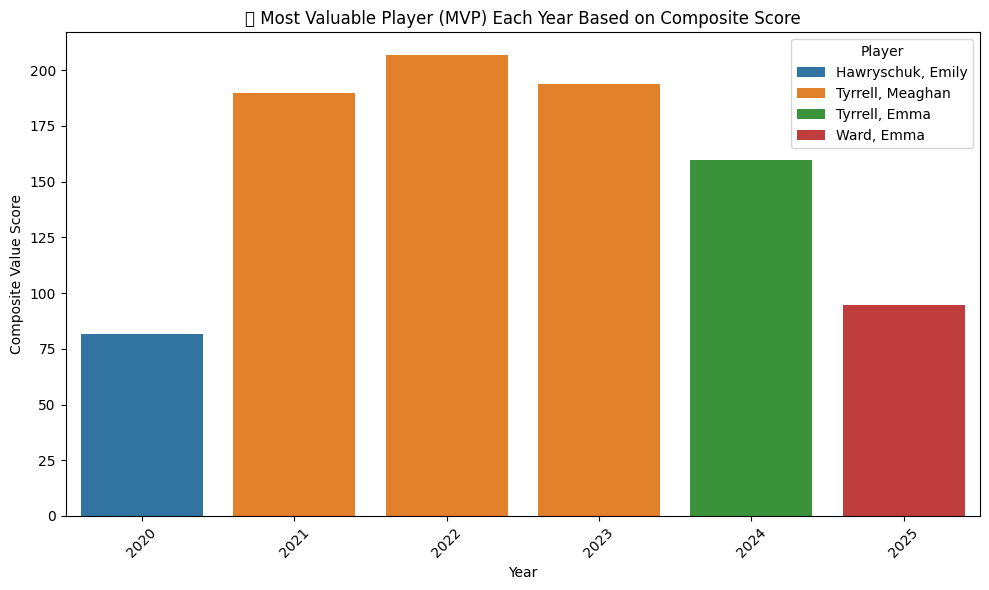

In [34]:
#import seaborn as sns
#import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=mvp_by_year, x='Year', y='Value_Score', hue='Player')
plt.title('🏆 Most Valuable Player (MVP) Each Year Based on Composite Score')
plt.ylabel('Composite Value Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Export Clean Summary Data to Feed ChatGPT

In [ ]:
df_clean[['Year', 'Player', 'Goals', 'Assists', 'Points', 'Turnovers', 'Game_Winning_Goals', 'SOG_Percentage', 'Value_Score']].to_csv("outputs/player_summary_snippet.csv", index=False)

